#### [이미지 합성]
- 픽셀(pixel) 단위 더셈 연산으로 이미지 픽셀 합치기
- 두 이미지 합성하기 위해 각각의 이미지에 가중치 주고 합성 진행
    - cv2.addW() : 합성 이미지에 가중치 설정

[1] 모듈 로딩 및 데이터 준비 <HR>

In [70]:
# [1-1] 모듈 로딩
import cv2
import matplotlib.pyplot as plt
import numpy as np

[2] 데이터 합성

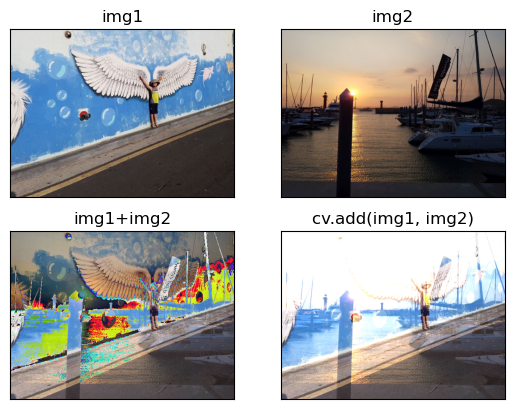

In [71]:
# ======================================================================
# [2-1] 이미지 단순 합성
# ======================================================================
# 데이터 준비
img1 = cv2.imread('../Data/Image/wing_wall.jpg')
img2 = cv2.imread('../Data/Image/yate.jpg')

# 이미지 덧셈
img3 = img1 + img2  # 더하기 연산
img4 = cv2.add(img1, img2) # OpenCV 함수

imgs = {'img1':img1, 'img2':img2, 'img1+img2': img3, 'cv.add(img1, img2)': img4}

# 이미지 출력
for i, (k, v) in enumerate(imgs.items()):
    plt.subplot(2,2, i + 1)
    plt.imshow(v[:,:,::-1])
    plt.title(k)
    plt.xticks([]); plt.yticks([])

plt.show()

In [72]:
# ======================================================================
# [2-2] 50% 알파 블렌딩
# ======================================================================
alpha = 0.5 # 합성에 사용할 알파 값

# NumPy 배열에 수식을 직접 연산해서 알파 블렌딩 적용
blended = img1 * alpha + img2 * (1-alpha)
blended = blended.astype(np.uint8) # 소수점 발생을 제거하기 위함
cv2.imshow('img1 * alpha + img2 * (1-alpha)', blended)

# addWeighted() 함수로 알파 블렌딩 적용
dst = cv2.addWeighted(img1, alpha, img2, (1-alpha), 0) 
cv2.imshow('cv2.addWeighted', dst)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [73]:
# ======================================================================
# [2-3] 트랙바로 알파 블렌딩
# ======================================================================
win_name = 'Alpha blending'     # 창 이름
trackbar_name = 'fade'          # 트렉바 이름

# 트렉바 이벤트 핸들러 함수
def onChange(x):
    alpha = x/100
    dst = cv2.addWeighted(img1, 1-alpha, img2, alpha, 0) 
    cv2.imshow(win_name, dst)


# 합성 영상 읽기
img1 = cv2.imread('../Data/Image/man_face.jpg')
img2 = cv2.imread('../Data/Image/lion_face.jpg')

# 이미지 표시 및 트렉바 붙이기
cv2.imshow(win_name, img1)
cv2.createTrackbar(trackbar_name, win_name, 0, 100, onChange)

cv2.waitKey()
cv2.destroyAllWindows()